<a href="https://colab.research.google.com/gist/Saumya2495/b9a1acb4ac38f1ac2ecbc1713d103887/python_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read in data
------------

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=694ae9957380f150'
df = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468548 entries, 0 to 3468547
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   date                                                object 
 8   retail_and_recreation_percent_change_from_baseline  float64
 9   grocery_and_pharmacy_percent_change_from_baseline   float64
 10  parks_percent_change_from_baseline                  float64
 11  transit_stations_percent_change_from_

In [4]:

df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [5]:
df.describe()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,744534.000000,2.195096e+06,2.122715e+06,1.654072e+06,1.756660e+06,3.291646e+06,1.990001e+06
mean,30358.557551,-2.297236e+01,-3.403261e+00,-8.715213e+00,-2.700905e+01,-1.962572e+01,9.160184e+00
std,15298.583381,2.843911e+01,2.400672e+01,5.778901e+01,3.026930e+01,2.020344e+01,8.083940e+00
min,1001.000000,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-1.000000e+02,-4.600000e+01
25%,18105.000000,-4.100000e+01,-1.400000e+01,-4.500000e+01,-4.800000e+01,-3.200000e+01,3.000000e+00
50%,29115.000000,-1.900000e+01,-2.000000e+00,-1.700000e+01,-2.800000e+01,-1.900000e+01,8.000000e+00
75%,45051.000000,-3.000000e+00,8.000000e+00,1.300000e+01,-7.000000e+00,-5.000000e+00,1.400000e+01
max,56045.000000,5.450000e+02,6.150000e+02,1.206000e+03,5.240000e+02,2.600000e+02,6.300000e+01


Basic data manipulations
------------------------

In [6]:

df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df['date'].dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468548 entries, 0 to 3468547
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   country_region_code                                 object        
 1   country_region                                      object        
 2   sub_region_1                                        object        
 3   sub_region_2                                        object        
 4   metro_area                                          object        
 5   iso_3166_2_code                                     object        
 6   census_fips_code                                    float64       
 7   date                                                datetime64[ns]
 8   retail_and_recreation_percent_change_from_baseline  float64       
 9   grocery_and_pharmacy_percent_change_from_baseline   float64       
 10  parks_percent_chan

In [7]:

df_subset = df[(df['country_region'].eq("India")) & (df['sub_region_1'].eq("Maharashtra")) & (df['sub_region_2'].isnull())]
df_subset.head()


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,day_name
1566127,IN,India,Maharashtra,NaN,NaN,IN-MH,NaN,2020-02-15,-3.0,-1.0,2.0,3.0,2.0,0.0,Saturday
1566128,IN,India,Maharashtra,NaN,NaN,IN-MH,NaN,2020-02-16,0.0,-1.0,1.0,2.0,0.0,0.0,Sunday
1566129,IN,India,Maharashtra,NaN,NaN,IN-MH,NaN,2020-02-17,-2.0,0.0,0.0,0.0,1.0,1.0,Monday
1566130,IN,India,Maharashtra,NaN,NaN,IN-MH,NaN,2020-02-18,0.0,1.0,1.0,2.0,1.0,0.0,Tuesday
1566131,IN,India,Maharashtra,NaN,NaN,IN-MH,NaN,2020-02-19,-1.0,-1.0,7.0,-3.0,-12.0,3.0,Wednesday


In [8]:

df_subset.isnull().sum() #no null values in percent_change_from_baseline fields

country_region_code                                     0
country_region                                          0
sub_region_1                                            0
sub_region_2                                          301
metro_area                                            301
iso_3166_2_code                                         0
census_fips_code                                      301
date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
day_name                                                0
dtype: int64

In [9]:
df_subset.isnull().sum() #no null values in percent_change_from_baseline fields
df_subset = df_subset.sort_values(by='date')
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 1566127 to 1566427
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 301 non-null    object        
 1   country_region                                      301 non-null    object        
 2   sub_region_1                                        301 non-null    object        
 3   sub_region_2                                        0 non-null      object        
 4   metro_area                                          0 non-null      object        
 5   iso_3166_2_code                                     301 non-null    object        
 6   census_fips_code                                    0 non-null      float64       
 7   date                                                301 non-null    datetime64[ns]
 8   

In [10]:
min_dt = df.date.min() #considering the date ranges from global dataset
max_dt = df.date.max() #considering the date ranges from global dataset
print(min_dt)
print(max_dt)

2020-02-15 00:00:00
2020-12-11 00:00:00


In [11]:
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='D' )
print(expected_range)
missing_days = expected_range.difference(df_subset['date'])
print(missing_days) #so no missing dates

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11'],
              dtype='datetime64[ns]', length=301, freq='D')
DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [12]:
# India lockdown March 25, 2020 https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_India
df_subset = df_subset[(df_subset['date'] >= pd.to_datetime('2020-03-25 00:00:00'))]
days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-25 00:00:00')).dt.days.values
days_since_lockdown

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

**Visualizing the Data** 


In [13]:

import matplotlib.pyplot as plt 
%matplotlib inline

In [14]:
df_subset.groupby('day_name')['workplaces_percent_change_from_baseline'].describe() #the percentage change for weekends is low

,count,mean,std,min,25%,50%,75%,max
day_name,,,,,,,,
Friday,38.0,-50.368421,14.313896,-79.0,-57.00,-48.0,-40.25,-29.0
Monday,37.0,-50.918919,13.614491,-78.0,-63.00,-49.0,-41.00,-33.0
Saturday,37.0,-44.972973,15.653339,-74.0,-55.00,-45.0,-33.00,-20.0
Sunday,37.0,-26.135135,15.129372,-57.0,-29.00,-23.0,-16.00,-5.0
Thursday,38.0,-51.000000,14.363994,-79.0,-58.75,-49.0,-39.50,-31.0
Tuesday,37.0,-50.810811,13.453289,-78.0,-56.00,-49.0,-41.00,-34.0
Wednesday,38.0,-49.973684,14.887845,-81.0,-60.50,-48.0,-39.25,-30.0


In [15]:
df_subset.groupby('day_name')['residential_percent_change_from_baseline'].describe() #the percentage change for weekends is low

,count,mean,std,min,25%,50%,75%,max
day_name,,,,,,,,
Friday,38.0,23.842105,7.858637,13.0,18.25,22.0,29.25,39.0
Monday,37.0,22.810811,7.741798,11.0,17.00,21.0,27.00,37.0
Saturday,37.0,22.027027,7.577329,10.0,17.00,21.0,26.00,36.0
Sunday,37.0,15.594595,5.833140,6.0,12.00,14.0,19.00,26.0
Thursday,38.0,23.210526,7.983625,12.0,17.25,22.0,28.50,37.0
Tuesday,37.0,22.810811,7.534505,12.0,17.00,22.0,27.00,37.0
Wednesday,38.0,22.710526,8.009818,11.0,17.00,22.0,29.50,37.0


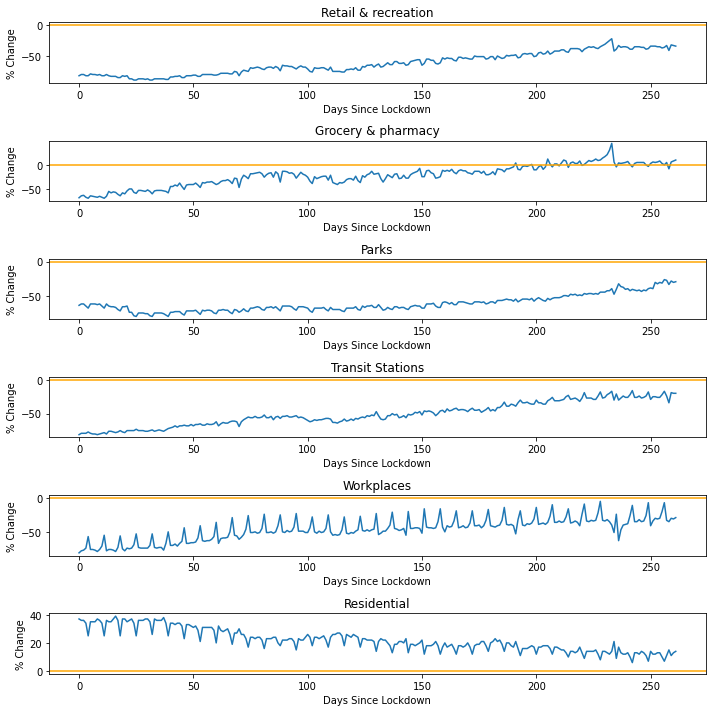

In [16]:
f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(611)
ax2 = f.add_subplot(612)
ax3 = f.add_subplot(613)
ax4 = f.add_subplot(614)
ax5 = f.add_subplot(615)
ax6 = f.add_subplot(616)
ax1.plot(days_since_lockdown,df_subset['retail_and_recreation_percent_change_from_baseline'])
ax1.axhline(y=0,color="orange")
ax1.set(xlabel='Days Since Lockdown',ylabel='% Change',title='Retail & recreation')
ax2.plot(days_since_lockdown,df_subset['grocery_and_pharmacy_percent_change_from_baseline'])
ax2.axhline(y=0,color="orange")
ax2.set(xlabel='Days Since Lockdown',ylabel='% Change',title='Grocery & pharmacy')
ax3.plot(days_since_lockdown,df_subset['parks_percent_change_from_baseline'])
ax3.axhline(y=0,color="orange")
ax3.set(xlabel='Days Since Lockdown', ylabel='% Change',title='Parks')
ax4.plot(days_since_lockdown,df_subset['transit_stations_percent_change_from_baseline'])
ax4.axhline(y=0,color="orange")
ax4.set(xlabel='Days Since Lockdown', ylabel='% Change',title='Transit Stations')
ax5.plot(days_since_lockdown,df_subset['workplaces_percent_change_from_baseline'])
ax5.axhline(y=0,color="orange")
ax5.set(xlabel='Days Since Lockdown', ylabel='% Change',title='Workplaces')
ax6.plot(days_since_lockdown,df_subset['residential_percent_change_from_baseline'])
ax6.axhline(y=0,color="orange")
ax6.set(xlabel='Days Since Lockdown', ylabel='% Change',title='Residential')
f.tight_layout()